# __*McLaren in the Hybrid Era*__
## __(2014 - Present)__

Hello!

We are going to explore McLaren's Formula 1 performance since the introduction of the hybrid engine in 2014.

The data we'll be taking a look at comes from a Formula 1 dataset fonund on Kaggle, which contains race data starting from 1950 and going up to the 2021 season's Austrian Grand Prix (July 4th, 2021).

__[Link to dataset](https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020)__

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import math
from IPython.display import display

In [2]:
# Read in the data - Here, we are assuming that the data is in the same directory,
# but this can be changed to point to where the files are stored locally
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
constructors = pd.read_csv('constructors.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')

In [3]:
# Displaying the top of each dataset we read in to verify that it looks correct

# Race result DataFrame
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
# Races DataFrame
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [5]:
# Constructors DataFrame
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [6]:
# Constructor standings DataFrame
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [7]:
# Getting information on McLaren from the list of constructors
constructors[constructors['name'] == 'McLaren']

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


With the above, we now know that McLaren has a **constructorId** of **1**, which we can use to filter out data that is not related to the team.

Now, let's take a look at how the team ranks in the constructor standings from 2014-2021.

In [8]:
# Joining the constructor standings and list of races
mclaren_standings = constructor_standings.merge(races, on='raceId')
mclaren_standings = mclaren_standings[(mclaren_standings['constructorId'] == 1) & (mclaren_standings['year'] >= 2014)]

# Convert the date column to datetime type
mclaren_standings['date'] = pd.to_datetime(mclaren_standings['date'])

# Getting the last date each season (and the last race with results in the 2021 season)
# to get the constructor standings for each year
last_race_each_season = mclaren_standings[['year', 'raceId', 'date']][mclaren_standings['date'] <= '2021-07-04']
last_race_each_season = last_race_each_season.groupby(['year']).max().reset_index()

# Joining the last race each season with McLaren's ranking to obtain the team standing at the last
# race of each season
mclaren_standings = mclaren_standings.merge(last_race_each_season, on='raceId')[['year_x', 'raceId', 'points', 'position', 'wins', 'date_x']]
mclaren_standings.rename(columns={'year_x': 'year', 'date_x': 'date_of_last_race', 
                        'position': 'constructor_standing'}, inplace=True)

# Displaying the year with McLaren's ranking that year
mclaren_standings[['year', 'constructor_standing']]

,year,constructor_standing
0,2014,5
1,2015,9
2,2016,6
3,2017,9
4,2018,6
5,2019,4
6,2020,3
7,2021,3


Starting in 2019, McLaren has improved their ranking in the constructor's championship compared to the previous years, and 2021 also looks to have a strong start with the team on track to match 2020's third place ranking.

In [9]:
# Filtering the results data to return times when McLaren has finished in first place
last_mclaren_win = results[(results['constructorId'] == 1) & (results['positionOrder'] == 1)]

# Joining the results and races tables on the raceId column and 
# returning the first row after sorting by raceId in descending order
last_mclaren_win = last_mclaren_win.merge(races, on='raceId')[['raceId', 'year', 'name', 'positionOrder']].sort_values(by='raceId', ascending=False).head(1)
last_mclaren_win

,raceId,year,name,positionOrder
177,879,2012,Brazilian Grand Prix,1


We can see that, within the range of the dataset, McLaren has not won a race since the 2012 Brazilian Grand Prix. This lies outside the range of time that we're focusing on, so instead of exploring McLaren's performance through race wins, we can try and see how many podiums the team has achieved starting from the 2014 season.

In [10]:
# Join the list of races with the results table to get all McLaren race results from 2014-Present
results_hybrid_era = races.merge(results, on='raceId')
results_hybrid_era = results_hybrid_era[(results_hybrid_era["year"] >= 2014) & (results_hybrid_era["constructorId"] == 1)]

# Dropping columns not being used
results_hybrid_era.drop(columns={'circuitId', 'date', 'time_x', 'url', 'position', 
                        'positionText', 'time_y', 'milliseconds', 'fastestLap', 'fastestLapTime',
                        'fastestLapSpeed'}, inplace=True)

# Displaying the resulting list of McLaren's race results from 2014-2021
results_hybrid_era.head()

,raceId,year,round,name,resultId,driverId,constructorId,number,grid,positionOrder,points,laps,rank,statusId
22134,900,2014,1,Australian Grand Prix,22131,825,1,20,4,2,18.0,57,6,1
22135,900,2014,1,Australian Grand Prix,22132,18,1,22,10,3,15.0,57,5,1
22160,901,2014,2,Malaysian Grand Prix,22157,18,1,22,10,6,8.0,56,11,1
22163,901,2014,2,Malaysian Grand Prix,22160,825,1,20,8,9,2.0,55,8,11
22193,902,2014,3,Bahrain Grand Prix,22190,18,1,22,6,17,0.0,55,10,8


,year,number_of_podiums
0,2014,2
1,2015,0
2,2016,0
3,2017,0
4,2018,0
5,2019,1
6,2020,2
7,2021,3


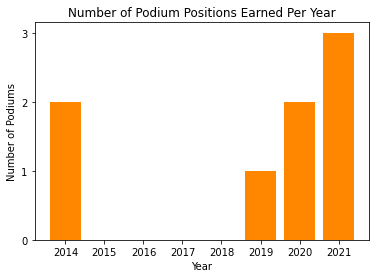

In [11]:
# Getting the number of podiums each year by getting the list of years and
# joining (using a left join) it with number of top 3 finishes. This allows 
# years without podium finishes to be included with zero as the number of podiums.
count_podiums = results_hybrid_era[results_hybrid_era['positionOrder'] <= 3].groupby('year')['positionOrder'].count().reset_index()
year_list = results_hybrid_era['year'].drop_duplicates().to_frame()
count_podiums = year_list.merge(count_podiums, how='left', on='year').fillna(0).astype(int)
count_podiums.rename(columns={'positionOrder': 'number_of_podiums'}, inplace=True)
display(count_podiums)

# Use a bar chart to display the number of podiums each year
plt.figure()
plt.bar(count_podiums['year'], count_podiums['number_of_podiums'], color='#FF8700')
plt.title('Number of Podium Positions Earned Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Podiums')
plt.ylim(1, None)
plt.yticks(range(0, count_podiums['number_of_podiums'].max() + 1))
plt.show()

After 2014, the team failed to finish in the top 3 positions for four years until 2019, and the current season seems to be their strongest yet in terms of finishing races closer to the front.

Even though the 2021 season is not complete, McLaren has already achieved the more podiums than any other year within this period.

In [12]:
# Calculating the average of the team's finishing positions
# and average points scored
average_race_results = results_hybrid_era.groupby('year')['positionOrder'].mean().reset_index()
average_points_scored = results_hybrid_era.groupby('year')['points'].mean().reset_index()

average_race_results = average_race_results.merge(average_points_scored, on='year')

# Rename columns to reflect the calculated values
average_race_results.rename(columns={'positionOrder': 'average_position', 
                'points': 'average_points_scored'}, inplace=True)

# Round the averages to the nearest tenth and display the DataFrame
average_race_results = average_race_results.round(1)
average_race_results

,year,average_position,average_points_scored
0,2014,8.9,4.8
1,2015,14.5,0.7
2,2016,12.7,1.8
3,2017,13.8,0.8
4,2018,12.8,1.5
5,2019,10.7,3.5
6,2020,8.6,5.9
7,2021,6.4,7.8


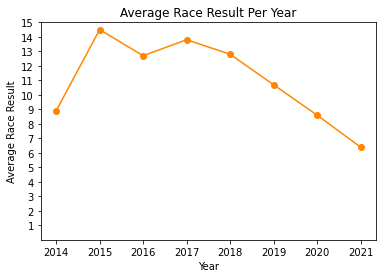

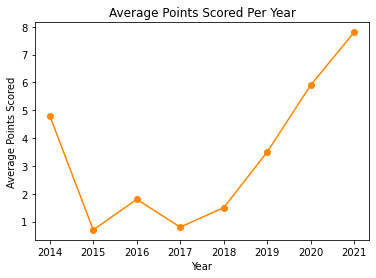

In [13]:
# Plot the average finishing position for the team each year
plt.figure()
plt.plot(average_race_results['year'], average_race_results['average_position'], 'o-', color='#FF8700')
plt.title('Average Race Result Per Year')
plt.xlabel('Year')
plt.ylabel('Average Race Result')
plt.ylim(0, None)
plt.yticks(range(1, (math.ceil(average_race_results['average_position'].max()) + 1)))
plt.show()

# Plot the average points scored (per race) for the team each year
plt.figure()
plt.plot(average_race_results['year'], average_race_results['average_points_scored'], 'o-', color='#FF8700')
plt.title('Average Points Scored Per Year')
plt.xlabel('Year')
plt.ylabel('Average Points Scored')
plt.show()

After a sharp decline in 2015, there are significant improvements in the average amount of points scored per race starting in 2019. Starting in 2020, the average race result that the drivers are finishing in lands within the top 10, which indicates that the team is scoring points more consistently in recent seasons.

In [14]:
# Joining the races DataFrame with the results DataFrame so that we can get the year of each race result
results_all_teams = races.merge(results, on='raceId')
results_all_teams = results_all_teams[results_all_teams['year'] >= 2014]

# The comment in the below line can be removed to display the top 5 rows in the results DataFrame joined
# with the races DataFrame

# results_all_teams.head()

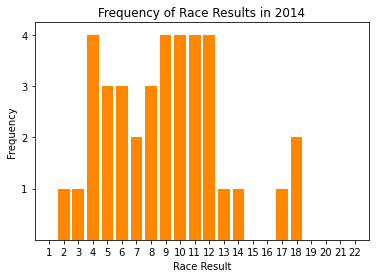

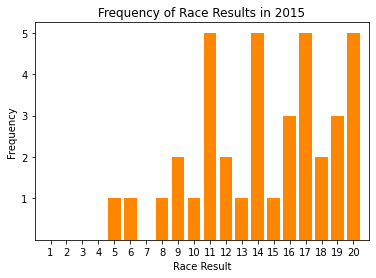

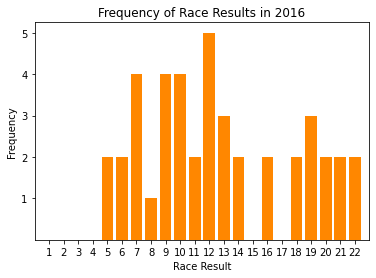

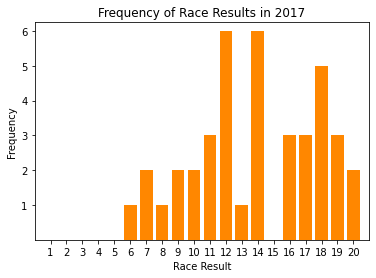

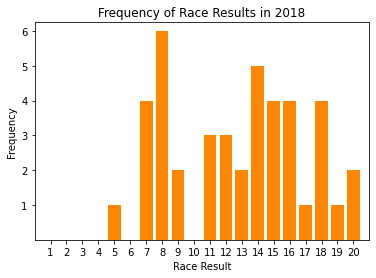

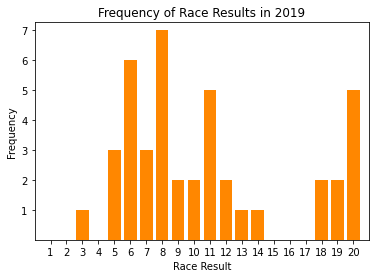

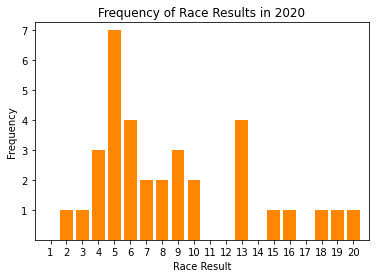

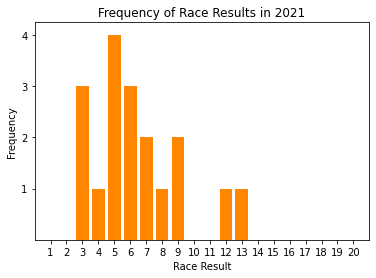

In [34]:
# Getting the number of drivers that participated by getting the
# highest position number that a driver placed in each year.
number_of_drivers = results_all_teams.groupby('year')['positionOrder'].max().reset_index()

# Frequency of race results from 2014 - 2021
for i in range(2014, 2022):
    plt.figure()
    # Get the races within each year and group by the position that the drivers finished in
    df = results_hybrid_era[results_hybrid_era['year'] == i].groupby('positionOrder')['raceId'].count().reset_index()
    df.rename(columns={'positionOrder': 'race_result', 
                'raceId': 'frequency'}, inplace=True)
    
    # Getting the number of the drivers in the year that is being visualized by using the
    # value calculated for the number_of_drivers DataFrame. This will set the limit of the x-axis.
    driver_count_this_year = number_of_drivers[number_of_drivers['year'] == i]['positionOrder'].item()

    # Plotting the year's race results in a bar graph
    plt.bar(df['race_result'], df['frequency'], color='#FF8700')
    plt.xlabel('Race Result')
    plt.ylabel('Frequency')

    # Setting the limits of the x and y axes. 0.25 is added to the y-axis limit because we want
    # a little space above the max value so that the bars are not touching the top border
    plt.xlim(0, driver_count_this_year + 1)
    plt.xticks(range(1, driver_count_this_year + 1))
    plt.ylim(0, (df['frequency'].max() + 0.25))
    plt.yticks(range(1, (df['frequency'].max() + 1)))
    plt.title('Frequency of Race Results in %d' % i)
    plt.show()
    i += 1

Seeing all of the team's race results reinforces previous observations when we got the average finishing position/points scored. Once again, 2015 seems like a year that McLaren noticeably struggled where the team went from having a majority of their finishes in the top 10 to primarily finishing out of the points.

2019 is the year that the team's results skew towards the left side of the graph, showing their gradual improvement that continues in the years afterwards. One thing that should be noted is that the lack of race result data in 2021 is made more obvious here due to only having nine races worth of data, but the team looks to have a strong start to the year, and both drivers are consistently finishing in the top 10 with only two exceptions.